In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [103]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/5qxp2ldwsel3ow2pq5mkvfas2rfaup')

In [104]:
df.type.value_counts()

FEC           841
government    352
Name: type, dtype: int64

In [109]:
df.head(3)

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state
0,Trump Campaign,"Donald J. Trump for President, Inc.","Apr 1, 2016",9000.00,Rent,Trump Plaza LLC,RENT,TRUMP PLAZA LLC,New York,NY
1,Trump Campaign,"Donald J. Trump for President, Inc.","Apr 1, 2016",6000.00,Rent,Trump CPS LLC,RENT,TRUMP CPS LLC,New York,NY
2,Trump Campaign,"Donald J. Trump for President, Inc.","Apr 1, 2017",39816.67,Rent,Trump Tower Commercial LLC,RENT,TRUMP TOWER COMMERCIAL LLC,Hicksville,NY


In [106]:
df.loc[(df.type == 'FEC') & (df.source == 'Donald J. Trump for President, Inc.'), 'type'] = 'Trump Campaign'

In [116]:
df.dropna(subset=['date'], inplace=True)

In [119]:
df.type.value_counts()

Trump Campaign    493
FEC               348
government        347
Name: type, dtype: int64

In [163]:
df.head()

,type,source,date,amount,purpose_scrubbed,property_scrubbed,purpose,property,city,state,year,month
0,Trump Campaign,"Donald J. Trump for President, Inc.",2016-04-01,9000.00,Rent,Trump Plaza LLC,RENT,TRUMP PLAZA LLC,New York,NY,2016,4
1,Trump Campaign,"Donald J. Trump for President, Inc.",2016-04-01,6000.00,Rent,Trump CPS LLC,RENT,TRUMP CPS LLC,New York,NY,2016,4
2,Trump Campaign,"Donald J. Trump for President, Inc.",2017-04-01,39816.67,Rent,Trump Tower Commercial LLC,RENT,TRUMP TOWER COMMERCIAL LLC,Hicksville,NY,2017,4
3,Trump Campaign,"Donald J. Trump for President, Inc.",2017-04-01,1000.00,Rent,Trump Restaurants LLC,RENT,TRUMP RESTAURANTS LLC,New York,NY,2017,4
4,government,Department of Defense,2017-04-10,1422.00,Lodging,Trump Hotel Panama,Hotels-Lodging,Trump International Hotel & Tower Panama,Panama City,Panama,2017,4


In [123]:
df.date = pd.to_datetime(df.date)

In [134]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [135]:
date_sum_by_type = df.groupby([df.year, df.month,'type']).amount.sum()

In [144]:
date_sum_by_type = date_sum_by_type.reset_index()

In [148]:
date_sum_by_type['day'] = 1

In [150]:
date_sum_by_type['date'] = pd.to_datetime(date_sum_by_type.loc[:, ['year', 'month', 'day']])

In [157]:
date_sum_by_type.head(2)

,year,month,type,amount,day,date
0,2015,4,Trump Campaign,1380.54,1,2015-04-01
1,2015,5,FEC,1303.46,1,2015-05-01


In [166]:
date_sum_type_cols = date_sum_by_type.pivot_table('amount', ['year', 'month', 'day', 'date'], 'type')

In [172]:
date_sum_type_cols.reset_index(inplace=True)

In [198]:
date_sum_type_cols.columns = ['index', 'year', 'month', 'day', 'date', 'Other Campaigns', 'Trump Campaign', 'Tax Payers']

{'year': [2016], 'month': [1], 'day': [1]}

0   2016-01-01
dtype: datetime64[ns]

<IPython.core.display.Javascript object>


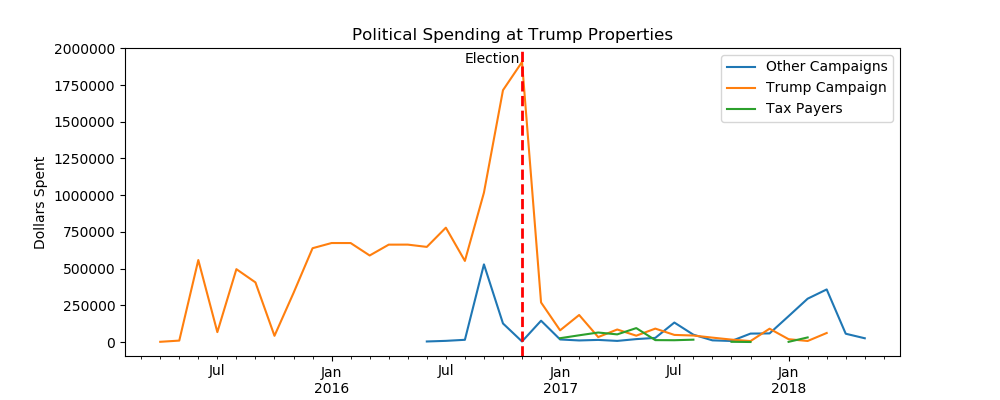

In [268]:
ax = date_sum_type_cols.plot.line(x='date', y=['Other Campaigns', 'Trump Campaign', 'Tax Payers'], figsize=(10,4), title='Political Spending at Trump Properties');
ax.set_ylabel('Dollars Spent')
ax.axvline(pd.to_datetime('2016-11-08'), color='r', linestyle='--', lw=2)
plt.text(pd.to_datetime('2016-8-08'),1900000,'Election',rotation=0)

plt.savefig('cory_gough_trump_election_spending.png')


In [259]:
!pwd

/Users/flatironschool/Documents/school/inclass/dc-ds-071519/Module-1/week-2/day_9_visualizations_seaborn


In [169]:
date_sum_type_cols.columns

Index(['year', 'month', 'day', 'date', 'FEC', 'Trump Campaign', 'government'], dtype='object', name='type')

<IPython.core.display.Javascript object>


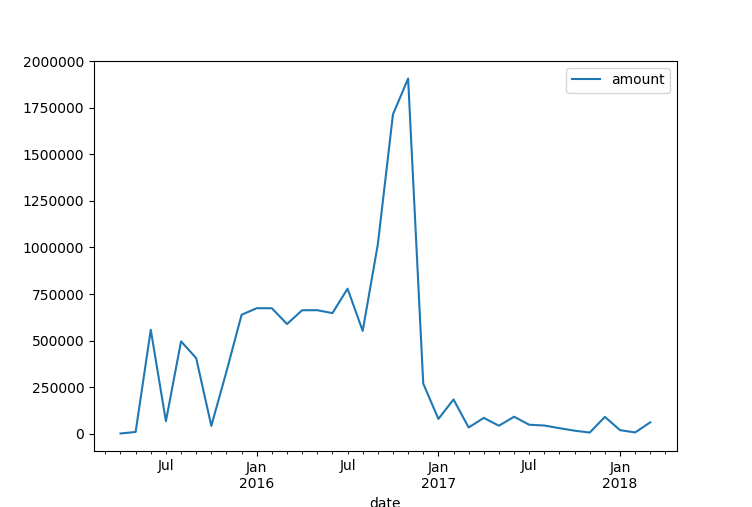

In [154]:
date_sum_by_type.loc[date_sum_by_type.type == 'Trump Campaign'].plot.line(x='date', y='amount')

In [8]:
import folium

In [79]:
map1 = folium.Map(location=[30, -90], zoom_start=3.5)
folium.CircleMarker(
    location=[40.0, -73.0],
    radius=10,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(map1)


In [80]:
map1